In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import sys
sys.path.insert(0, "lib")  # add the library folder to the path I look for modules
import latexify
blue = '#1f77b4'
red = '#d62728'
green = '#2ca02c'

Generate Figure 1, it 

In [2]:
conta = 0
def dynamic_programming_test(P_setting,bias, l ,lookup):
        key = (l,bias)
        if (l == K):
            if bias == 0:
                lookup[key] = P_setting
                #print(lookup,'\n',P_setting)
                return P_setting# return the probability of the state
            else:
                lookup[key] = 0
                return 0 #configuration doesn't respect the bias, it has probability 0
        
        if key not in lookup:
            include = P_setting * dynamic_programming_test(P[j[l]],bias+inter[l], l+1,lookup)
            exclude = P_setting *  dynamic_programming_test(1-P[j[l]],bias, l+1 ,lookup)
            lookup[key] = include + exclude
        #print(l)
        if l ==0:
            return lookup[key],lookup
        return lookup[key]
    
def recursion(bias, l,lookup):
    key = (l,bias)
    if (l == K+1):
        bias = (bias-theta)/ np.sqrt(avg_degree)
        lookup[key] = np.tanh(bias/2/T)
        return np.tanh(bias/2/T)
    if key not in lookup:
        include = P[j[l-1]] * recursion(bias+inter[l-1], l+1 ,lookup)# include node l with prob. P[j[l]]
        exclude = (1-P[j[l-1]]) *  recursion(bias, l+1,lookup )# ignore node l
        lookup[key] = include + exclude        
    if l ==1:
        return lookup[key],lookup
    return  lookup[key]


In [3]:
def create_graph( N,kin):
    G = nx.generators.directed.random_uniform_k_out_graph(N,kin,self_loops = False, with_replacement=False)
    G = G.reverse()
    J = nx.adjacency_matrix(G)
    sign_interaction = np.where(np.random.rand(J.nnz)>0.5,1,-1)/np.sqrt(kin)
    J.data = sign_interaction
    return J
J = create_graph(100,4)
N = J.shape[0]
A = J.tocsc()
js = [A.indices[A.indptr[i]:A.indptr[i + 1]] for i in range(N)]  # list of list, structure is [el[i]] where el[i]
# is the list of  predecessors of gene i ( the index)
interaction = [A.data[A.indptr[i]:A.indptr[i + 1]] for i in range(N)]  # list of list, structure is [el[i]]
# where el[i] is the list of  predecessors of gene i (interaction strength with sign)
interaction = [np.where(inter>0,1,-1) for inter in interaction]#make interactions as +=1 rather than floats
Ks = np.diff(A.indptr)  # in degree of each gene


In [4]:
for i in range(N):
    if all(interaction[i] == [1,-1,-1,1]):
        break
T = 1
theta = 0
avg_degree = np.mean(Ks)
K = Ks[i]
j = js[i]
inter = interaction[i]
P = np.random.rand(N)
a,b = recursion(0,1,{})

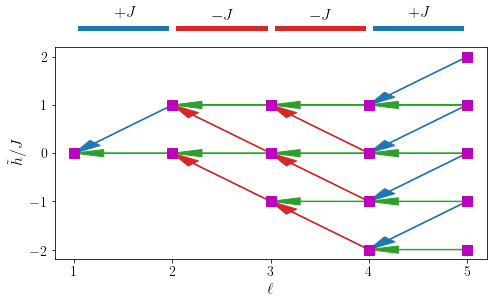

In [5]:
latexify.latexify(columns = 1)
indices = np.array(list(b.keys()))
cond = np.array(list(b.values()))>0#consider non zero probability
_,axes = plt.subplots(2,1,gridspec_kw={'height_ratios': [1, 10]},sharex=True)
axes[1].plot(*indices[:,:2].T,'ms',ms = 10)
axes[1].set_xlabel('$\ell$',fontsize = 16)
axes[1].set_ylabel('$\\tilde{h}/J$',fontsize = 16)
axes[1].set_xticks(range(1,K+2))
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
axes[1].set_yticks(range(int(plt.ylim()[0]),int(plt.ylim()[1])+1))
#axes[0].plot(list(zip(np.arange(len(inter))[inter==1],np.arange(1,1+len(inter))[inter==1]))[0],[0.5,0.5])
pos = list(zip(np.arange(1,len(inter)+1)[inter==1],np.arange(2,2+len(inter))[inter==1]))
neg = list(zip(np.arange(1,len(inter)+1)[inter==-1],np.arange(2,2+len(inter))[inter==-1]))
for x in pos:
    axes[0].plot(x,[0.,0.],'-s',c = blue,lw = 5,mfc = 'w',mec = 'w')
    axes[0].text(sum(x)/2-0.1,0.05,'$+J$',fontsize = 16)
for x in neg:
    axes[0].plot(x,[0.,0.],'-s',c = red,lw =5 ,mfc = 'w',mec = 'w')
    axes[0].text(sum(x)/2-0.1,0.05,'$-J$',fontsize = 16)

axes[0].axis('off')
for l,h in indices:
    if l <K+1:
        #plt.plot([l,l+1],[h,h],'k--')
        plt.arrow(l+1,h,-1,0,width = 0.01,length_includes_head = True,color = green,head_width = 0.15,head_length=0.3)
        s = inter[l-1]
        if s >0:
            plt.arrow(l+1,h+inter[l-1],-1,-inter[l-1],width = 0.01,length_includes_head = True,color = '#1f77b4',head_width = 0.15,head_length=0.3)#blue
        else:
            plt.arrow(l+1,h+inter[l-1],-1,-inter[l-1],width = 0.01,length_includes_head = True,color = '#d62728',head_width = 0.15,head_length=0.3)#red
plt.tight_layout()
#plt.savefig('dynamical_programming.pdf')